In [297]:
import numpy as np
import copy
import time
import pytz
import datetime
import math
import re
import os
import pandas as pd
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

from sklearn import metrics, svm

# whether or not to split into train and test
split_data = True

In [542]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#dataset = pd.read_csv('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv')


def getTrainTest(csv, labels, disease):
    #print(csv)
    #print(csv.loc[:, labels])

    csv = csv.loc[:, labels]

    #csv = csv[0][features]
    #newDataset = csv[:,features]
    X = csv.iloc[:, :-1].values
    #print(X)
    y = csv.iloc[:, -1].values    # split into train and test sets
    #print(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
    features = y
    
    return X_train, X_test, y_train, y_test


def splitByDis(csv, dis):
    csvSubset = pd.DataFrame()
        
    new_column_name = "Disease (CF=1,H=2,copd=3)"
    new_val = csv.columns.get_loc(new_column_name)

    index = new_val
    for row in csv.iterrows():
        if row[1][index] == float(dis):
            #print(row[1])
            csvSubset = csvSubset.append(row[1])
            #print(csvSubset)
    csvSubset = pd.DataFrame(data=csvSubset)
    #print(csvSubset)
    return csvSubset

def convertLabels(csv, features):
    data = read_csv(csv, header=None)
    dataset = data.values
    #print(dataset.shape)
    #print(dataset[:,features])
    labels = dataset[0][features]
    
    #newDataset = dataset[:,features]
    
    #print(features)
    #print(labels)
    
    return labels


def predictions(csv, feats, disease):
    
    dataset = pd.read_csv(csv)
    dataset = splitByDis(dataset, disease)
    
    labels = convertLabels(csv, feats)
    X_train, X_test, y_train, y_test = getTrainTest(dataset, labels, disease)
    
    #model = svm.SVR()
    #model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)
    #model.fit(X_train, y_train)
    model = LinearRegression()
    #model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    

    y_pred = model.predict(X_test)
    pred = np.linalg.norm(y_pred - np.array(y_test).astype(float))
    #print(pred)
    #print(y_test)
    corr = correlation(y_pred, y_test)
    return(pred, y_test, corr)

import seaborn as sns
import matplotlib.pyplot as plt


def correlation(y_pred, y_test):
    covariance = np.cov(y_pred, y_test)
    #print("Covariance matrix of x:\n", np.cov(a))
    #print("\nCovariance matrix of the said arrays:\n", covariance)

    pred = ['y_pred', 'y_test']
    
    correlation = abs(np.corrcoef(y_pred, y_test))
    # plotting correlation heatmap
    #dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True, vmax=1, vmin=-1, xticklabels=pred, yticklabels=pred)
  
    #displaying heatmap
    #plt.show()
    
    return(correlation[0][1])
    
def correlationArray(correlation):
    return correlation[0][1]

def corrAverage(correlationArray):
    sumCorr = 0
    #print(x.type())
    for x in correlationArray:
        sumCorr = sumCorr + abs(float(x))
    mean = sumCorr / len(correlationArray)
    return mean
    
def bestFeatsDis(csv, feats, disease):
    featurePred=[]
    featureCorrs=[]
    featsCopy = feats
    length = len(feats)
    
    for x in range(length-1):
        featsCopy = featsCopy[:x] + featsCopy[(x+1):]
        predict = predictions(csv, featsCopy, disease)
        featurePred.append(predict[0])
        featureCorrs.append(predict[2])
        featsCopy = []
        featsCopy = feats   
        
    #print("Prediction")
    #print(featurePred)
    #print(predict[1])

    #featurePred shows the prediction if this feature was removed. If score is low, this means prediction would be lower if this was removed
    
    L = [ (featurePred[i],i) for i in range(len(featurePred)) ]
    L.sort()
    sorted_l,permutationL = zip(*L)
    permutationNpL = np.array(permutationL)
    #print(permutationNpL)
    #print(convertLabels(csv, permutationNpL))
    #featureCorrs shows the prediction if this feature was removed. If score is low, this means prediction would be lower if this was removed

    
    print("Correlation")
    print(featureCorrs)

    N = [ (abs(featureCorrs[j]),j) for j in range(len(featureCorrs)) ]
    N.sort()
    sorted_n,permutationN = zip(*N)
    permutationNpN = np.array(permutationN)
        
    print(permutationNpN)
    print(convertLabels(csv, permutationNpN))

    featurePred = np.array(featurePred)
   
    '''a = np.array(featurePred)
    print("Shape of array:\n", np.shape(a))
    print("Covariance matrix of x:\n", np.cov(a))'''

    corrAvg = 0.0
    corrAvg = corrAverage(featureCorrs)
    #return permutationNpL, permutationNpN
    
    print(corrAvg)
    print("variance: ", np.var(featureCorrs))

    return(corrAvg)

features = [0,1,2,3,4,5,6,7]
predsCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', features, 1)
#print(convertLabels('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', predsCOPD[0]))
#print(convertLabels('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', predsCOPD[1]))



Correlation
[0.5600174847286669, 0.5572153808914947, 0.5749675394683829, 0.5705316655879499, 0.2813536811083175, 0.5895608792403082, 0.568306584133312]
[4 1 0 6 3 2 5]
['Vis' 'Age' 'Gender(1=F)' 'Disease (CF=1,H=2,copd=3)' 'Sub' 'BMI' 'FEV1%']
0.5288504593083474
variance:  0.010305322340470265


# Combined

Fatty

In [543]:
features = [0,1,2,3,4,5,6,7]

In [544]:
predsDiaFCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', features, 1)
#print(convertLabels('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', predsDiaFCF))
print("-------------")
predsDiaFHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', features, 2)
#print(convertLabels('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', predsDiaFHealthy))
print("-------------")
predsDiaFCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', features, 3)
#print(convertLabels('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combDiaFatty.csv', predsDiaFCOPD))
print("-------------")

Correlation
[0.5600174847286669, 0.5572153808914947, 0.5749675394683829, 0.5705316655879499, 0.2813536811083175, 0.5895608792403082, 0.568306584133312]
[4 1 0 6 3 2 5]
['Vis' 'Age' 'Gender(1=F)' 'Disease (CF=1,H=2,copd=3)' 'Sub' 'BMI' 'FEV1%']
0.5288504593083474
variance:  0.010305322340470265
-------------
Correlation
[0.7786979089986925, 0.7967328785608243, 0.6554695327455743, 0.7863866226767174, 0.05312060009703143, 0.47813301613541287, 0.7968234913643207]
[4 5 2 0 3 1 6]
['Vis' 'FEV1%' 'BMI' 'Gender(1=F)' 'Sub' 'Age' 'Disease (CF=1,H=2,copd=3)']
0.6207662929397962
variance:  0.06544329492189596
-------------
Correlation
[0.4850846096402811, 0.34439218024411744, 0.47396361243946805, 0.5452100072854054, 0.5083640217171398, 0.4867456008617312, 0.4906919659790554]
[1 2 0 5 6 4 3]
['Age' 'BMI' 'Gender(1=F)' 'FEV1%' 'Disease (CF=1,H=2,copd=3)' 'Vis' 'Sub']
0.4763502854524569
variance:  0.0033678875915121634
-------------


In [545]:
predsPecsFCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combPecsFatty.csv', features, 1)
print("-------------")
predsPecsFHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combPecsFatty.csv', features, 2)
print("-------------")
predsPecsFCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combPecsFatty.csv', features, 3)
print("-------------")

Correlation
[0.34275907048458265, 0.7292553120928807, 0.7295792360707828, 0.6448297314703745, 0.4438295419634945, 0.6624456475395205, 0.702301235980601]
[0 4 3 5 6 1 2]
['Gender(1=F)' 'Vis' 'Sub' 'FEV1%' 'Disease (CF=1,H=2,copd=3)' 'Age' 'BMI']
0.6078571108003195
variance:  0.02000034131125693
-------------
Correlation
[0.052100738008495684, 0.5615602922589971, 0.4333060143587857, 0.6476015761292223, 0.5793186944776886, 0.6451492635880504, 0.5798039233002242]
[0 2 1 4 6 5 3]
['Gender(1=F)' 'BMI' 'Age' 'Vis' 'Disease (CF=1,H=2,copd=3)' 'FEV1%' 'Sub']
0.4998343574459234
variance:  0.037766567085400674
-------------
Correlation
[0.27610448781913943, 0.043836373391699664, 0.44490001781353505, 0.5225490004611386, 0.2809113596440854, 0.4751771918051641, 0.2822332065360919]
[1 0 4 6 2 5 3]
['Age' 'Gender(1=F)' 'Vis' 'Disease (CF=1,H=2,copd=3)' 'BMI' 'FEV1%' 'Sub']
0.3322445196386935
variance:  0.02297199888719661
-------------


In [546]:
predsParaFCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combParaFatty.csv', features, 1)
print("-------------")
predsParaFHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combParaFatty.csv', features, 2)
print("-------------")
predsParaFCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combParaFatty.csv', features, 3)
print("-------------")

Correlation
[0.5227015912327785, 0.7639289367287504, 0.25940808076722566, 0.3216862934179975, 0.31522576285110343, 0.5533215323390014, 0.24571847995275542]
[6 2 4 3 0 5 1]
['Disease (CF=1,H=2,copd=3)' 'BMI' 'Vis' 'Sub' 'Gender(1=F)' 'FEV1%' 'Age']
0.4259986681842303
variance:  0.03188064451875868
-------------
Correlation
[0.3149694970429295, 0.33045867750589847, 0.048798643373222, 0.6399857727987376, 0.1805647883031071, 0.2688960418169388, 0.2155721309250378]
[2 4 6 5 0 1 3]
['BMI' 'Vis' 'Disease (CF=1,H=2,copd=3)' 'FEV1%' 'Gender(1=F)' 'Age' 'Sub']
0.2856065073951245
variance:  0.02867919240464616
-------------
Correlation
[0.3093384436153423, 0.10342601764542828, 0.15859083171437807, 0.27089748690137155, 0.3415453203731132, 0.32648198666579176, 0.1948807475691448]
[1 2 6 3 0 5 4]
['Age' 'BMI' 'Disease (CF=1,H=2,copd=3)' 'Sub' 'Gender(1=F)' 'FEV1%' 'Vis']
0.24359440492636714
variance:  0.007254039230971254
-------------


In [547]:
predsAbdFCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combAbdFatty.csv', features, 1)
print("-------------")
predsAbdFHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combAbdFatty.csv', features, 2)
print("-------------")
predsAbdFCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/fatty/combAbdFatty.csv', features, 3)
print("-------------")

Correlation
[0.009574474023372909, 0.754606523968775, 0.5156437342207632, 0.5372990358185793, 0.6815134676126055, 0.2642630134901144, 0.39193746875394264]
[0 5 6 2 3 4 1]
['Gender(1=F)' 'FEV1%' 'Disease (CF=1,H=2,copd=3)' 'BMI' 'Sub' 'Vis' 'Age']
0.4506911025554504
variance:  0.05573637541324556
-------------
Correlation
[0.10601262341376232, 0.08617959449267554, 0.07137208523031172, 0.1032664044917293, 0.10406690655213162, 0.07220470068529695, 0.015094858524288504]
[6 2 5 1 3 4 0]
['Disease (CF=1,H=2,copd=3)' 'BMI' 'FEV1%' 'Age' 'Sub' 'Vis' 'Gender(1=F)']
0.07974245334145658
variance:  0.0008832580309447957
-------------
Correlation
[0.7888753679968006, 0.6374523183820726, 0.8304602407035137, 0.8659486764731475, 0.7958241368380261, 0.788003027073508, 0.8028444626543051]
[1 5 0 4 6 2 3]
['Age' 'FEV1%' 'Gender(1=F)' 'Vis' 'Disease (CF=1,H=2,copd=3)' 'BMI' 'Sub']
0.7870583185887677
variance:  0.004402800966419281
-------------


[0.7870583185887677, 0.6207662929397962, 0.6078571108003195, 0.5288504593083474, 0.4998343574459234, 0.4763502854524569, 0.4506911025554504, 0.4259986681842303, 0.3322445196386935, 0.2856065073951245, 0.24359440492636714, 0.07974245334145658]


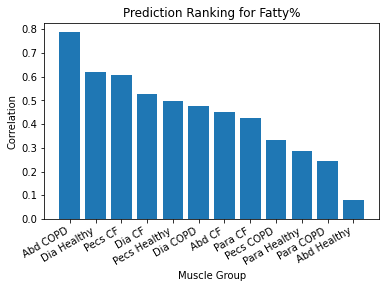

Prediction Ranking for Fatty% by Muscle Group and Disease


In [548]:

predsFatty = [[predsDiaFCF, "Dia CF"], [predsDiaFHealthy, "Dia Healthy"], [predsDiaFCOPD, "Dia COPD"], 
               [predsPecsFCF, "Pecs CF"], [predsPecsFHealthy, "Pecs Healthy"],[predsPecsFCOPD,"Pecs COPD"],
               [predsParaFCF, "Para CF"],[predsParaFHealthy, "Para Healthy"], [predsParaFCOPD, "Para COPD"],
               [predsAbdFCF, "Abd CF"],[predsAbdFHealthy, "Abd Healthy"],[predsAbdFCOPD, "Abd COPD"]]

def getKey(item):
    return item[0]

sortedPred = sorted(predsFatty, key=getKey, reverse = True)

def split(predictions):
    pred=[]
    name=[]
    for x in predictions:
        pred.append(x[0])
        name.append(x[1])
    return pred, name

pair = split(sortedPred)
preds = pair[0]
names = pair[1]

def plotCorrsComb(preds, names, title):
    import matplotlib.pyplot as plt
    dates = preds
    height = preds
    bars = names
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.ylabel("Correlation")
    plt.xlabel("Muscle Group")

    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.show()
    
print(preds)
plotCorrsComb(preds, names, 'Prediction Ranking for Fatty%') 
print('Prediction Ranking for Fatty% by Muscle Group and Disease')

In [549]:
features = [0,1,2,3,4,5,6]

In [550]:
predsDiaMCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combDiaM.csv', features, 1)
print("-------------")
predsDiaMHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combDiaM.csv', features, 2)
print("-------------")
predsDiaMCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combDiaM.csv', features, 3)
print("-------------")

Correlation
[0.32660867794490644, 0.46683033761829706, 0.494927157797994, 0.32052338577032496, 0.49050436590256846, 0.42604248246292376]
[3 0 5 1 4 2]
['BMI' 'Gender(1=F)' 'Disease (CF=1,H=2,copd=3)' 'Age' 'FEV1%' 'Height']
0.4209060679161691
variance:  0.0052378577936921175
-------------
Correlation
[0.4105441403262274, 0.3303349852332617, 0.4751227222480227, 0.4834749563829727, 0.1307121336676992, 0.4698084723674198]
[4 1 0 5 2 3]
['FEV1%' 'Age' 'Gender(1=F)' 'Disease (CF=1,H=2,copd=3)' 'Height' 'BMI']
0.38333290170426726
variance:  0.015549718282206672
-------------
Correlation
[0.7542404703347233, 0.7254936737714281, 0.45493352204540927, 0.777357843544639, 0.745309709400198, 0.7447096814688894]
[2 1 5 4 0 3]
['Height' 'Age' 'Disease (CF=1,H=2,copd=3)' 'FEV1%' 'Gender(1=F)' 'BMI']
0.7003408167608812
variance:  0.012280833174338953
-------------


In [551]:
predsPecsMCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combPecsM.csv', features, 1)
print("-------------")
predsPecsMHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combPecsM.csv', features, 2)
print("-------------")
predsPecsMCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combPecsM.csv', features, 3)
print("-------------")

Correlation
[0.4793830579455198, 0.07559454420512875, 0.2744695402078185, 0.4609189509941178, 0.5133666996570402, 0.4668681257212878]
[1 2 3 5 0 4]
['Age' 'Height' 'BMI' 'Disease (CF=1,H=2,copd=3)' 'Gender(1=F)' 'FEV1%']
0.3784334864551522
variance:  0.0242570420589745
-------------
Correlation
[0.02732951240192682, 0.4414048547365654, 0.35503132139919313, 0.5994706531934915, 0.45869127347736144, 0.5163105991808755]
[0 2 1 4 5 3]
['Gender(1=F)' 'Height' 'Age' 'FEV1%' 'Disease (CF=1,H=2,copd=3)' 'BMI']
0.3997063690649023
variance:  0.03323011360205582
-------------
Correlation
[0.7025123651381365, 0.6452920580244303, 0.6644399809049878, 0.5052760899451408, 0.5194526432065889, 0.5213839596370217]
[3 4 5 1 2 0]
['BMI' 'FEV1%' 'Disease (CF=1,H=2,copd=3)' 'Age' 'Height' 'Gender(1=F)']
0.5930595161427177
variance:  0.0063441037321897605
-------------


In [563]:
predsParaMCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combParaM.csv', features, 1)
print("-------------")
predsParaMHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combParaM.csv', features, 2)
print("-------------")
predsParaMCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combParaM.csv', features, 3)
print("-------------")

TypeError: predictions() takes 2 positional arguments but 3 were given

In [553]:
predsAbdMCF = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combAbdM.csv', features, 1)
print("-------------")
predsAbdMHealthy = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combAbdM.csv', features, 2)
print("-------------")
predsAbdMCOPD = bestFeatsDis('/Users/soniasharapova/Documents/FatiResearch/combinedCSV/muscle/combAbdM.csv', features, 3)
print("-------------")

Correlation
[0.45777130478554157, 0.5468828006228927, 0.5413423081620191, 0.48280224037717345, 0.5204660540740692, 0.5777490551854697]
[0 3 4 2 1 5]
['Gender(1=F)' 'BMI' 'FEV1%' 'Height' 'Age' 'Disease (CF=1,H=2,copd=3)']
0.5211689605345277
variance:  0.0016268724474818367
-------------
Correlation
[0.18833912809810022, 0.3419725654287832, 0.41183109470992113, 0.5642030629255976, 0.4434674472950646, 0.44022722682714155]
[0 1 2 5 4 3]
['Gender(1=F)' 'Age' 'Height' 'Disease (CF=1,H=2,copd=3)' 'FEV1%' 'BMI']
0.3983400875474347
variance:  0.013126874238303768
-------------
Correlation
[0.24431809444866595, 0.5424851699560207, 0.06991295210084118, 0.1898171597667451, 0.48548360979282806, 0.5841863460077517]
[2 3 0 4 1 5]
['Height' 'BMI' 'Gender(1=F)' 'FEV1%' 'Age' 'Disease (CF=1,H=2,copd=3)']
0.3527005553454754
variance:  0.03758029961732187
-------------


[0.7003408167608812, 0.6515232171107131, 0.5930595161427177, 0.5211689605345277, 0.47313073297643554, 0.4209060679161691, 0.3997063690649023, 0.3983400875474347, 0.38333290170426726, 0.3784334864551522, 0.3527005553454754, 0.2526973036458073]


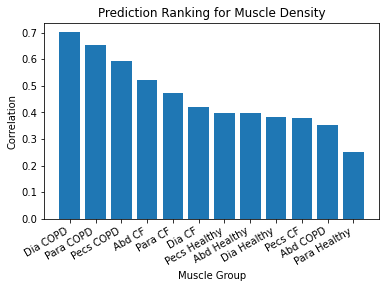

Prediction Ranking for Muscle Density by Muscle Group and Disease


In [554]:

predsMuscle = [[predsDiaMCF, "Dia CF"], [predsDiaMHealthy, "Dia Healthy"], [predsDiaMCOPD, "Dia COPD"], 
               [predsPecsMCF, "Pecs CF"], [predsPecsMHealthy, "Pecs Healthy"],[predsPecsMCOPD,"Pecs COPD"],
               [predsParaMCF, "Para CF"],[predsParaMHealthy, "Para Healthy"], [predsParaMCOPD, "Para COPD"],
               [predsAbdMCF, "Abd CF"],[predsAbdMHealthy, "Abd Healthy"],[predsAbdMCOPD, "Abd COPD"]]


sortedPredM = sorted(predsMuscle, key=getKey, reverse = True)

pairM = split(sortedPredM)
predsM = pairM[0]
namesM = pairM[1]    

print(predsM)
#print(preds)

plotCorrsComb(predsM, namesM, 'Prediction Ranking for Muscle Density') 
print('Prediction Ranking for Muscle Density by Muscle Group and Disease')

In [564]:
predictionsRF = [0.37917125045892064, 0.16631013315558762, 0.4073437347938263, 0.3753622997570073, 0.38941464449074953, 0.2583246336435315, 0.39044178132336654, 0.09972899338310094, 0.09972899338310094, 0.26692579607424866, 0.47112743892464337, 0.47112743892464337]
predictionsSVR = [0.2276079633838847, 0.4852961151716012, 0.0948631350676279, 0.2935754623496015, 0.6048283982850107, 0.30751618849007034, 0.30667394771772816, 0.142165689489194, 0.142165689489194, 0.584071287693524, 0.2709203035403639, 0.2709203035403639]
predictionsOLS = [0.4651156651056024, 0.5086696599726305, 0.4870775920068012, 0.5675282390983607, 0.5236811196003011, 0.3157685803654266, 0.422690566906956, 0.2792566874406841, 0.2792566874406841, 0.4446779450371084, 0.10649247701993106, 0.10649247701993106]
#predictionsLinReg = [0.5288504593083474, 0.6207662929397962, 0.4763502854524569, 0.6078571108003195, 0.4998343574459234, 0.3322445196386935, 0.4259986681842303, 0.2856065073951245, 0.2856065073951245, 0.4506911025554504, 0.07974245334145658, 0.07974245334145658]

predictionsLinReg = predsM

def corrMean(pred):
    sumPred = 0
    for x in pred:
        sumPred = sumPred + x
    #print(sumPred / len(pred))
    return(sumPred / len(pred))

def plotCorrs(p1, p2, p3, p4):
    import matplotlib.pyplot as plt
    plt.plot(p1)
    plt.plot(p2)
    plt.plot(p3)
    plt.plot(p4)
    plt.ylabel('Correlation')
    plt.xlabel('Variable Removed')
    plt.title('Model Comparison for Average Correlation: Combined')
    plt.legend(['Random Forest', 'SVR', 'OLS', 'Linear Regression'])

    plt.show()
    
def plotCorr(p, labels):
    import matplotlib.pyplot as plt
    plt.plot(p)
    plt.ylabel('Correlation')
    plt.xlabel('Variable Removed')
    plt.title('Correlation Between y_test and y_pred')

    plt.show()
    
    height = p
    bars = (labels)
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, height)

    # Create names on the x-axis
    plt.xticks(y_pos, bars)

    # Show graphic
    plt.show()
    
print("Linear RF: ", corrMean(predictionsRF))
print("Linear SVR: ", corrMean(predictionsSVR))
print("Linear OLS: ", corrMean(predictionsOLS))
print("Linear Regression: ", corrMean(predictionsLinReg))

corrMean(predictionsRF)
corrMean(predictionsSVR)
corrMean(predictionsOLS)
corrMean(predictionsLinReg)
#plotCorr(predictionsLinReg, labels) 


Linear RF:  0.31458392819272724
Linear SVR:  0.31088370701818036
Linear OLS:  0.3755589747512014
Linear Regression:  0.4604450012670403


0.4604450012670403

In [580]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

features = [0,1,2,3,4,5,6,7]


def getTrainTest(csv, labels):
    #print(csv)
    #print(csv.loc[:, labels])

    csv = csv.loc[:, labels]

    #csv = csv[0][features]
    #newDataset = csv[:,features]
    X = csv.iloc[:, :-1].values
    #print(X)
    y = csv.iloc[:, -1].values    # split into train and test sets
    #print(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
    features = y
    
    return X_train, X_test, y_train, y_test


def convertLabels(csv, features):
    data = read_csv(csv, header=None)
    dataset = data.values
    #print(dataset.shape)
    #print(dataset[:,features])
    labels = dataset[0][features]
    
    #newDataset = dataset[:,features]
    
    #print(features)
    #print(labels)
    
    return labels


def predictions(csv, feats):
    
    dataset = pd.read_csv(csv)
    
    labels = convertLabels(csv, feats)
    X_train, X_test, y_train, y_test = getTrainTest(dataset, labels)
    
    #model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)

    model = svm.SVR()
    #model = LinearRegression()
    #model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    #print(model.summary())

    y_pred = model.predict(X_test)
    pred = np.linalg.norm(y_pred - np.array(y_test).astype(float))
    #print(pred)
    #print(y_test)
    corr = correlation(y_pred, y_test)
    return(pred, y_test, corr)

import seaborn as sns
import matplotlib.pyplot as plt


def correlation(y_pred, y_test):
    covariance = np.cov(y_pred, y_test)
    #print("Covariance matrix of x:\n", np.cov(a))
    #print("\nCovariance matrix of the said arrays:\n", covariance)

    pred = ['y_pred', 'y_test']
    
    correlation = abs(np.corrcoef(y_pred, y_test))
    #print(correlationArray(correlation))
    return(correlation[0][1])
    #sns.heatmap(covariance, annot=True, fmt='g', xticklabels=pred, yticklabels=pred)
    #plt.show()
    
    # plotting correlation heatmap
    #dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True, vmax=1, vmin=-1, xticklabels=pred, yticklabels=pred)
  
    # displaying heatmap
    #plt.show()
    
def corrAvgSq(preds):
    newPreds = []
    for x in preds:
        sqare = x^2
        newPreds.append(sqare)
    return(newPreds)
    
def correlationArray(correlation):
    return correlation[0][1]
    

def corrAverage(correlationArray):
    sumCorr = 0
    #print(x.type())
    for x in correlationArray:
        sumCorr = sumCorr + abs(float(x))
    mean = sumCorr / len(correlationArray)
    return mean

def bestFeats(csv, feats):
    featurePred=[]
    featureCorrs=[]
    featsCopy = feats
    length = len(feats)
    
    for x in range(length-1):
        featsCopy = featsCopy[:x] + featsCopy[(x+1):]
        predict = predictions(csv, featsCopy)
        featurePred.append(predict[0])
        featureCorrs.append(predict[2])
        featsCopy = []
        featsCopy = feats   
        
    #print("Prediction")
    #print(featurePred)

    #featurePred shows the prediction if this feature was removed. If score is low, this means prediction would be lower if this was removed
    
    L = [ (featurePred[i],i) for i in range(len(featurePred)) ]
    L.sort()
    sorted_l,permutationL = zip(*L)
    permutationNpL = np.array(permutationL)
    #print(permutationNpL)
    #print(convertLabels(csv, permutationNpL))
    #featureCorrs shows the prediction if this feature was removed. If score is low, this means prediction would be lower if this was removed

    
    #print("Correlation")
    #print(featureCorrs)

    N = [ (featureCorrs[j],j) for j in range(len(featureCorrs)) ]
    N.sort()
    sorted_n,permutationN = zip(*N)
    permutationNpN = np.array(permutationN)
        
    #print(permutationNpN)
    #print(convertLabels(csv, permutationNpN))

    featurePred = np.array(featurePred)
   
    corrAvg = 0.0
    corrAvg = corrAverage(featureCorrs)
    #return permutationNpL, permutationNpN
    print(corrAvg)
    print("variance: ", np.var(featureCorrs))
    #print(featureCorrs)
    #print(corrAvgSq(featureCorrs))

    return(corrAvg)


# CF only

Fatty

In [581]:
predsDiaF = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Fatty/RCFDiaF.csv', features)
print("-------------")
predsPecsF = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Fatty/RCFPecsF.csv', features)
print("-------------")
predsParaF = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Fatty/RCFParaF.csv', features)
print("-------------")
predsAbdF = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Fatty/RCFAbdF.csv', features)
print("-------------")

0.09284815560335057
variance:  0.009831768813999778
-------------
0.4998165738268287
variance:  0.003998459470666973
-------------
0.5953252903624785
variance:  0.0026726258292440416
-------------
0.31335392469046713
variance:  0.00932758900528423
-------------


[0.5953252903624785, 0.4998165738268287, 0.31335392469046713, 0.09284815560335057]


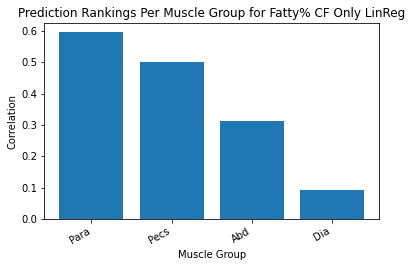

In [582]:
predsFattyCF = [[predsDiaF, "Dia"], 
               [predsPecsF, "Pecs"], 
               [predsParaF, "Para"],
               [predsAbdF, "Abd"]]


sortedPredFattyCF = sorted(predsFattyCF, key=getKey, reverse = True)

pairFattyCF = split(sortedPredFattyCF)
predsFattyCF = pairFattyCF[0]
print(predsFattyCF)
namesFattyCF = pairFattyCF[1]    

plotCorrsComb(predsFattyCF, namesFattyCF, 'Prediction Rankings Per Muscle Group for Fatty% CF Only LinReg') 

In [583]:
print(predsFattyCF)

[0.5953252903624785, 0.4998165738268287, 0.31335392469046713, 0.09284815560335057]


Muscle

In [584]:
predsDiaM = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Muscle/RCFDiaM.csv', features)
print("-------------")
predsPecsM = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Muscle/RCFPecsM.csv', features)
print("-------------")
predsParaM = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Muscle/RCFParaM.csv', features)
print("-------------")
predsAbdM = bestFeats('/Users/soniasharapova/Documents/FatiResearch/CFonlyCSV/Muscle/RCFAbdM.csv', features)
print("-------------")

0.6022833616745551
variance:  0.004830359216256916
-------------
0.5613141170991933
variance:  0.0022179159730658375
-------------
0.5999731186016356
variance:  0.010242051200482735
-------------
0.5821431051131774
variance:  0.003978571984670046
-------------


[0.6022833616745551, 0.5999731186016356, 0.5821431051131774, 0.5613141170991933]


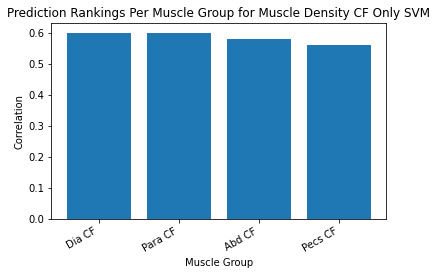

In [585]:
predsMuscleCF = [[predsDiaM, "Dia CF"], 
               [predsPecsM, "Pecs CF"], 
               [predsParaM, "Para CF"],
               [predsAbdM, "Abd CF"]]


sortedPredMuscleCF = sorted(predsMuscleCF, key=getKey, reverse = True)

pairMuscleCF = split(sortedPredMuscleCF)
predsMuscleCF = pairMuscleCF[0]
print(predsMuscleCF)
namesMuscleCF = pairMuscleCF[1]    

plotCorrsComb(predsMuscleCF, namesMuscleCF, 'Prediction Rankings Per Muscle Group for Muscle Density CF Only SVM') 

In [571]:
#predictionsRF = [0.21031504328396733, 0.21153016317975087, 0.33605839072916716, 0.1145958509824098, 0.3380365477230022, 0.7152704085146953, 0.6135640734186211, 0.33229849556152496]
#predictionsSVR = [0.09284815560335057, 0.4998165738268287, 0.5953252903624785, 0.31335392469046713, 0.6022833616745551, 0.5613141170991933, 0.5999731186016356, 0.5821431051131774]
#predictionsOLS = [0.07188445832267147, 0.40285856321039565, 0.32037567575525067, 0.3752702693123754, 0.3894213130625643, 0.1826928835243566, 0.5486710355494143, 0.43766369867435045]
#predictionsLinReg = [0.016853496028915727, 0.46290607330169387, 0.29743283348011207, 0.33641166513552634, 0.34315506564775805, 0.03776268222706607, 0.4406641583954269, 0.4138543623001742]
predictionsRF = [0.35235864287679364, 0.2807422831980155, 0.22379702283716923, 0.21715826459443852, 0.6782305592748129, 0.5851496524051603, 0.3949119580972546, 0.3948080835022783]
predictionsOLS = [0.40285856321039565, 0.3752702693123754, 0.32037567575525067, 0.12142553198861805, 0.6782305592748129, 0.5851496524051603, 0.3949119580972546, 0.3948080835022783]
predictionsSVR = [0.5953252903624785, 0.4998165738268287, 0.31335392469046713, 0.09284815560335057, 0.6022833616745551, 0.5999731186016356, 0.5821431051131774, 0.5613141170991933]
predictionsLinReg = [0.46290607330169387, 0.33641166513552634, 0.29743283348011207, 0.06494746854959045, 0.4406641583954269, 0.4138543623001742, 0.34315506564775805, 0.12001641361605807]


def corrMean(pred):
    sumPred = 0
    for x in pred:
        sumPred = sumPred + x
    #print(sumPred / len(pred))
    return(sumPred / len(pred))

def plotCorrs(p1, p2, p3, p4):
    import matplotlib.pyplot as plt
    plt.plot(p1)
    plt.plot(p2)
    plt.plot(p3)
    plt.plot(p4)
    plt.ylabel('Correlation')
    plt.xlabel('Variable Removed')
    plt.title('Model Comparison for Average Correlation: CF Only')
    plt.legend(['Random Forest', 'SVR', 'OLS', 'Linear Regression'])

    plt.show()
    
print("Random Forest: ", corrMean(predictionsRF),
      "\nSVR: ", corrMean(predictionsSVR), 
      "\nOLS: ", corrMean(predictionsOLS), 
      "\nLinear Regression: ", corrMean(predictionsLinReg))
corrMean(predictionsRF)
corrMean(predictionsSVR)
corrMean(predictionsOLS)
corrMean(predictionsLinReg)
#plotCorrs(predictionsRF, predictionsSVR, predictionsOLS, predictionsLinReg) 


Random Forest:  0.3908945583482404 
SVR:  0.48088220587146074 
OLS:  0.40912878669326824 
Linear Regression:  0.3099235050532925


0.3099235050532925